   Global_active_power  Global_reactive_power  Voltage  Global_intensity  \
0                4.216                  0.418   234.84              18.4   
1                5.360                  0.436   233.63              23.0   
2                5.374                  0.498   233.29              23.0   
3                5.388                  0.502   233.74              23.0   
4                3.666                  0.528   235.68              15.8   

   Sub_metering_1  Sub_metering_2  Sub_metering_3           Date_Time  
0             0.0             1.0            17.0 2006-12-16 17:24:00  
1             0.0             1.0            16.0 2006-12-16 17:25:00  
2             0.0             2.0            17.0 2006-12-16 17:26:00  
3             0.0             1.0            17.0 2006-12-16 17:27:00  
4             0.0             1.0            17.0 2006-12-16 17:28:00  
       Global_active_power  Global_reactive_power       Voltage  \
count         34168.000000           34168.0

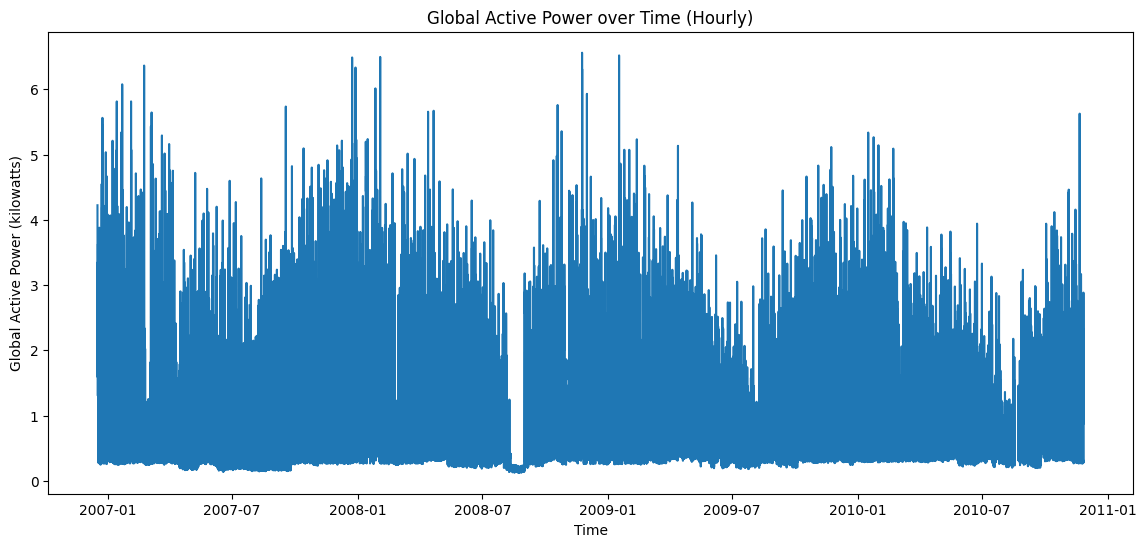

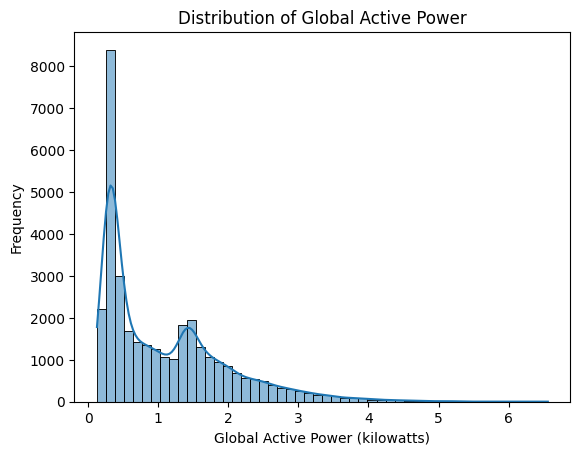

<Figure size 800x500 with 0 Axes>

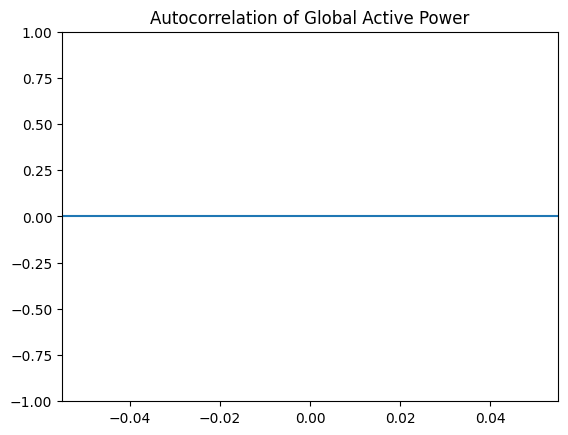

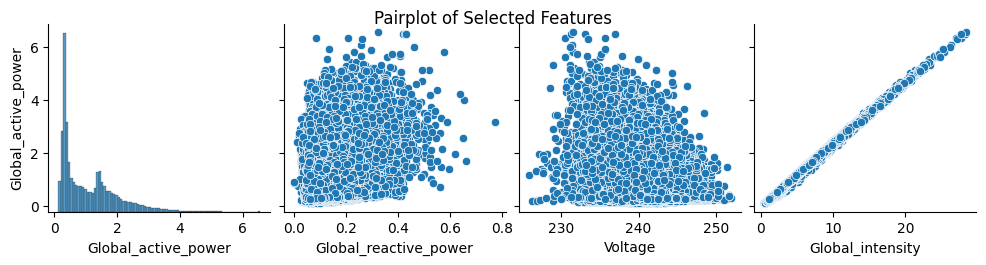

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf

# Load the dataset
df = pd.read_csv('household_power_consumption.txt', sep=';', low_memory=False, na_values=['?'])

# Combine 'Date' and 'Time' columns and convert to datetime
df['Date_Time'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], dayfirst=True)

# Drop original 'Date' and 'Time' columns
df.drop(['Date', 'Time'], axis=1, inplace=True)

# Display first few rows
print(df.head())

# Convert target and features to numeric
df[['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']] = df[['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']].apply(pd.to_numeric, errors='coerce')

# Drop rows with missing values
df.dropna(inplace=True)

# Set 'Date_Time' as index
df.set_index('Date_Time', inplace=True)

# Resample to hourly mean, improves clarity for plots
df_hourly = df.resample('h').mean()

# Summary statistics
print(df_hourly.describe())

# Time series plot of Global Active Power
plt.figure(figsize=(14, 6))
plt.plot(df_hourly['Global_active_power'])
plt.title('Global Active Power over Time (Hourly)')
plt.xlabel('Time')
plt.ylabel('Global Active Power (kilowatts)')
plt.show()

# Histogram of Global Active Power
sns.histplot(df_hourly['Global_active_power'], bins=50, kde=True)
plt.title('Distribution of Global Active Power')
plt.xlabel('Global Active Power (kilowatts)')
plt.ylabel('Frequency')
plt.show()

# Autocorrelation plot
plt.figure(figsize=(8, 5))
plot_acf(df_hourly['Global_active_power'], lags=50)
plt.title('Autocorrelation of Global Active Power')
plt.show()

# Pairplot of selected features
sns.pairplot(df_hourly[['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity']], y_vars=['Global_active_power'])
plt.suptitle('Pairplot of Selected Features', y=1.02)
plt.show()

<ipython-input-2-1379356244>:9: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df = pd.read_csv('household_power_consumption.txt', sep=';',
<ipython-input-2-1379356244>:9: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df = pd.read_csv('household_power_consumption.txt', sep=';',
<ipython-input-2-1379356244>:9: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df = pd.read_csv('household_power_consumption.txt', sep=';',
<ipython-input-2-1379356244>:26: FutureWarning: 'H' is deprecated and will be removed in a future version, please use

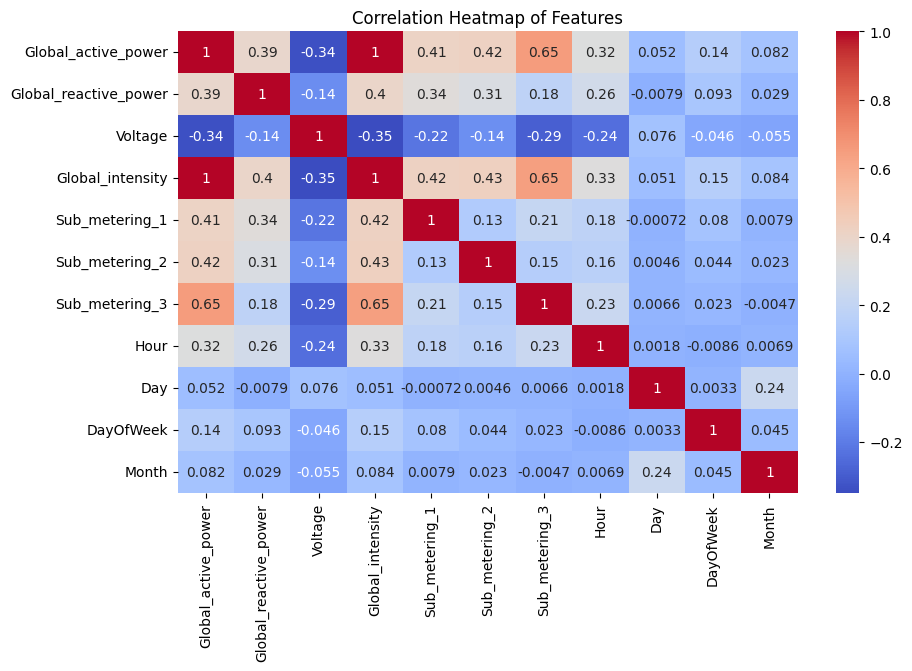

                     Global_active_power  Global_reactive_power   Voltage  \
Datetime                                                                    
2006-12-16 17:00:00             4.222889               1.735057 -1.501419   
2006-12-16 18:00:00             3.632200              -0.622349 -1.520243   
2006-12-16 19:00:00             3.400233              -0.540059 -1.918367   
2006-12-16 20:00:00             3.268567              -0.700420 -1.670512   
2006-12-16 21:00:00             3.056467              -0.675627 -0.758512   

                     Global_intensity  Sub_metering_1  Sub_metering_2  \
Datetime                                                                
2006-12-16 17:00:00          2.962613       -0.332501       -0.226897   
2006-12-16 18:00:00          2.379909       -0.332501        1.086185   
2006-12-16 19:00:00          2.124297       -0.332501       -0.034767   
2006-12-16 20:00:00          1.987556       -0.332501       -0.338874   
2006-12-16 21:00:00   

In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv('household_power_consumption.txt', sep=';',
                 parse_dates={'Datetime': ['Date', 'Time']},
                 infer_datetime_format=True, low_memory=False,
                 na_values=['?'])

# Convert target and features to numeric
for col in ['Global_active_power', 'Global_reactive_power', 'Voltage',
            'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Drop missing values
df.dropna(inplace=True)

# Set datetime as index
df.set_index('Datetime', inplace=True)

# Resample to hourly means
df_hourly = df.resample('H').mean()

# Drop any new missing values after resampling
df_hourly.dropna(inplace=True)

# Handle outliers using IQR method (for Global_active_power)
Q1 = df_hourly['Global_active_power'].quantile(0.25)
Q3 = df_hourly['Global_active_power'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_hourly = df_hourly[(df_hourly['Global_active_power'] >= lower_bound) &
                      (df_hourly['Global_active_power'] <= upper_bound)]

# Create time-based features
df_hourly['Hour'] = df_hourly.index.hour
df_hourly['Day'] = df_hourly.index.day
df_hourly['DayOfWeek'] = df_hourly.index.dayofweek
df_hourly['Month'] = df_hourly.index.month

# Define seasons
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

df_hourly['Season'] = df_hourly['Month'].apply(get_season)

# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df_hourly.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Features')
plt.show()

# Standardize numeric features for regression
numeric_features = ['Global_reactive_power', 'Voltage', 'Global_intensity',
                    'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3',
                    'Hour', 'Day', 'DayOfWeek', 'Month']

scaler = StandardScaler()
df_scaled = df_hourly.copy()
df_scaled[numeric_features] = scaler.fit_transform(df_hourly[numeric_features])

# Preview the processed dataset
print(df_scaled.head())


<ipython-input-6-904313335>:10: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  data = pd.read_csv(url, delimiter=";", low_memory=False, parse_dates=[[0, 1]], infer_datetime_format=True, na_values=["?"])
<ipython-input-6-904313335>:10: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  data = pd.read_csv(url, delimiter=";", low_memory=False, parse_dates=[[0, 1]], infer_datetime_format=True, na_values=["?"])
<ipython-input-6-904313335>:10: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data = pd.read_csv(url, delimiter=";", low_memory=Fa

Root Mean Squared Error: 0.04440620070550992


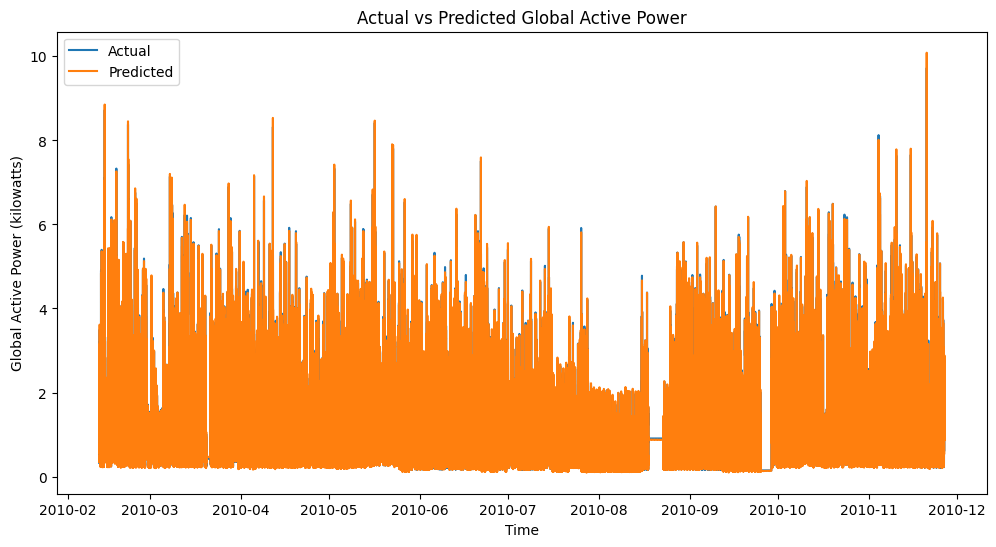

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load dataset (adjust the file path as needed)
url = "household_power_consumption.txt"
data = pd.read_csv(url, delimiter=";", low_memory=False, parse_dates=[[0, 1]], infer_datetime_format=True, na_values=["?"])

# Set 'Date_Time' as the index and convert to datetime objects
data.rename(columns={'Date_Time': 'datetime'}, inplace=True)
data.set_index('datetime', inplace=True)


# Fill missing values (you can choose different imputation strategies)
data.fillna(method='ffill', inplace=True)

# Extract relevant columns for the model
data = data[['Global_active_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']]

# Extract time-based features (hour, day of the week, and month)
data['hour'] = data.index.hour
data['dayofweek'] = data.index.dayofweek
data['month'] = data.index.month

# Drop rows with missing values (if any after feature extraction)
data.dropna(inplace=True)

# Split data into features (X) and target (y)
X = data[['Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3', 'hour', 'dayofweek', 'month']]
y = data['Global_active_power']

# Split the data into training and testing sets (80-20 split, with no shuffling)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model using Root Mean Squared Error (RMSE)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Root Mean Squared Error: {rmse}")

# Visualize actual vs predicted Global Active Power
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label='Actual')
plt.plot(y_test.index, y_pred, label='Predicted')
plt.legend()
plt.title('Actual vs Predicted Global Active Power')
plt.xlabel('Time')
plt.ylabel('Global Active Power (kilowatts)')
plt.show()

<ipython-input-1-828871045>:11: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  data = pd.read_csv(url, delimiter=";", low_memory=False, parse_dates=[['Date', 'Time']], infer_datetime_format=True, na_values=["?"])
<ipython-input-1-828871045>:11: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  data = pd.read_csv(url, delimiter=";", low_memory=False, parse_dates=[['Date', 'Time']], infer_datetime_format=True, na_values=["?"])
<ipython-input-1-828871045>:11: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data = pd.read_csv(url, delimite

Root Mean Squared Error: 0.04440620070550992


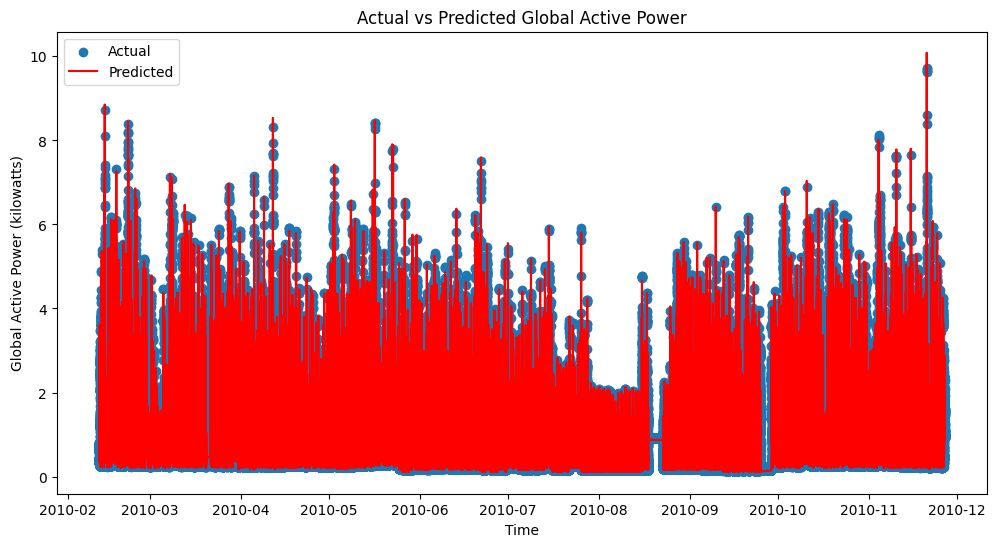

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load dataset
url = "household_power_consumption.txt"
data = pd.read_csv(url, delimiter=";", low_memory=False, parse_dates=[['Date', 'Time']], infer_datetime_format=True, na_values=["?"])

# Set 'datetime' as the index and convert to datetime objects
data.set_index('Date_Time', inplace=True)

# Fill missing values
data.fillna(method='ffill', inplace=True)

# Extract relevant columns for the model
data = data[['Global_active_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']]

# Create time-based features
data['hour'] = data.index.hour
data['dayofweek'] = data.index.dayofweek
data['month'] = data.index.month

# Drop rows with missing values (if any after feature extraction)
data.dropna(inplace=True)

# Split data into features (X) and target (y)
X = data[['Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3', 'hour', 'dayofweek', 'month']]
y = data['Global_active_power']

# Split the data into training and testing sets (80-20 split, with no shuffling)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model using Root Mean Squared Error (RMSE)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Root Mean Squared Error: {rmse}")

# Visualize actual vs predicted Global Active Power
plt.figure(figsize=(12, 6))
plt.scatter(X_test.index, y_test, label='Actual')
plt.plot(X_test.index, y_pred, label='Predicted', color='red')
plt.xlabel('Time')
plt.ylabel('Global Active Power (kilowatts)')
plt.title('Actual vs Predicted Global Active Power')
plt.legend()
plt.show()